# IMports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
from scipy.fftpack import fft


# Plot corr deep


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# === 1. Load and Prepare Data ===

df_uk = pd.read_csv('../data/UK_consolidated_df.csv')
df_us = pd.read_csv('../data/US_consolidated_df.csv')
df_uk['date'] = pd.to_datetime(df_uk['date'])
df_us['date'] = pd.to_datetime(df_us['date'])
df_uk = df_uk[df_uk['date'] > '2003-05-01'].reset_index(drop=True)

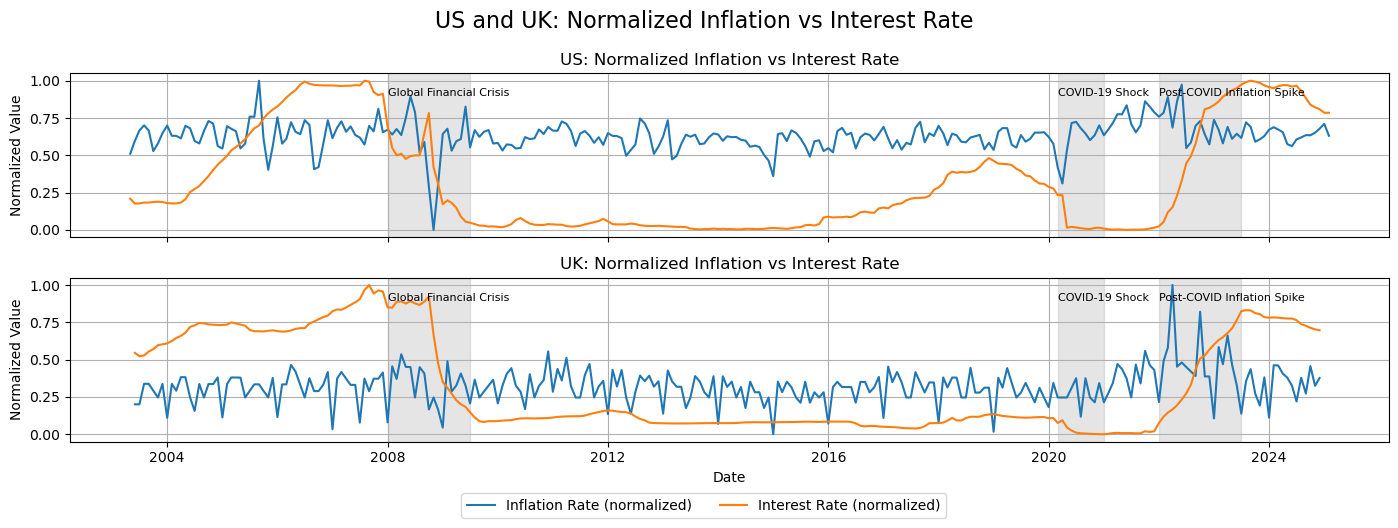

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Example min-max scaling function
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize for UK
df_uk['infl_rate_norm'] = min_max_scaling(df_uk['infl_rate'])
df_uk['int_3m_norm'] = min_max_scaling(df_uk['int_3m'])

# Normalize for US
df_us['infl_rate_norm'] = min_max_scaling(df_us['infl_rate'])
df_us['int_3m_norm'] = min_max_scaling(df_us['int_3m'])

# Define key periods to highlight
highlight_periods = [
    (pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-30'), 'Global Financial Crisis'),
    (pd.to_datetime('2020-03-01'), pd.to_datetime('2021-01-01'), 'COVID-19 Shock'),
    (pd.to_datetime('2022-01-01'), pd.to_datetime('2023-06-30'), 'Post-COVID Inflation Spike'),
]

# Create 2x1 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# US plot
ax1.plot(df_us['date'], df_us['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax1.plot(df_us['date'], df_us['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax1.set_title("US: Normalized Inflation vs Interest Rate")
ax1.set_ylabel("Normalized Value")
ax1.grid(True)

# Highlight and annotate on US plot
for start, end, label in highlight_periods:
    ax1.axvspan(start, end, color='gray', alpha=0.2)
    ax1.text(start, 0.95, label, rotation=0, fontsize=8, color='black', verticalalignment='top')

# UK plot
ax2.plot(df_uk['date'], df_uk['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax2.plot(df_uk['date'], df_uk['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax2.set_title("UK: Normalized Inflation vs Interest Rate")
ax2.set_xlabel("Date")
ax2.set_ylabel("Normalized Value")
ax2.grid(True)

# Highlight and annotate on UK plot
for start, end, label in highlight_periods:
    ax2.axvspan(start, end, color='gray', alpha=0.2)
    ax2.text(start, 0.95, label, rotation=0, fontsize=8, color='black', verticalalignment='top')

# Shared legend
handles = [
    plt.Line2D([], [], color='tab:blue', label='Inflation Rate (normalized)'),
    plt.Line2D([], [], color='tab:orange', label='Interest Rate (normalized)')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Add overall title
fig.suptitle("US and UK: Normalized Inflation vs Interest Rate", fontsize=16)

# Adjust layout to make space for title and legend
plt.tight_layout()
plt.show()


The chart compares the normalized inflation and interest rates in the US and UK. In both countries, interest rates typically lag behind inflation. During the 2008–2009 Global Financial Crisis, interest rates in both countries were slashed dramatically as central banks responded aggressively to the downturn. This sharp drop was not immediately captured by inflation, which declined more gradually. This reflects the delayed impact of monetary easing. In the post-crisis years, interest rates remained near zero, while inflation stayed relatively stable. During the COVID-19 pandemic in 2020, rapid rate cuts was followed by a delayed inflation surge. In both the US and UK, interest rate hikes in 2022–2023 came only after inflation had already spiked, suggesting a reactive rather than preemptive monetary stance. Overall, the chart highlights the lag between inflation movements and policy responses.

# Outlier Detection

C:\Users\Justin\AppData\Local\Temp\ipykernel_22356\3203641457.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())
C:\Users\Justin\AppData\Local\Temp\ipykernel_22356\3203641457.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels())


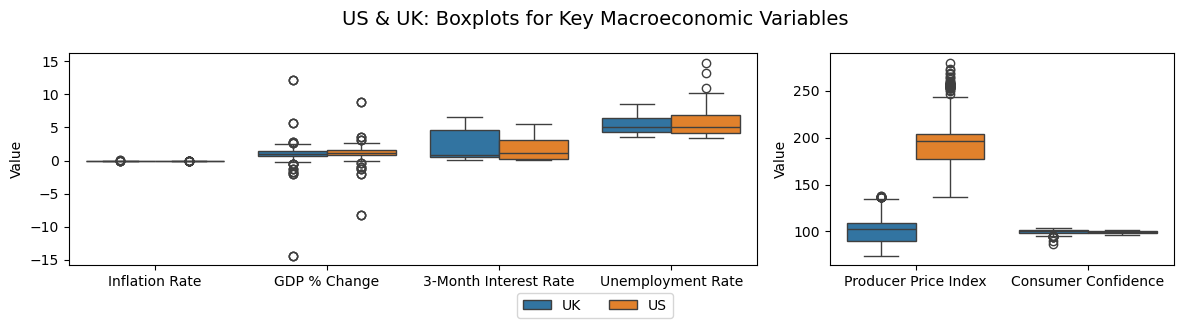

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split variable groups
main_vars = ['Inflation Rate', 'GDP % Change', '3-Month Interest Rate', 'Unemployment Rate']
right_vars = ['Producer Price Index', 'Consumer Confidence']

# Create subplots with custom width ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), 
                               gridspec_kw={'width_ratios': [2, 1]}, 
                               sharey=False)

# Left plot (2/3 space)
sns.boxplot(x='Variable', y='Value', hue='Country',
            data=df_combined[df_combined['Variable'].isin(main_vars)],
            ax=ax1)
# ax1.set_title('Boxplots: Inflation, GDP, Interest, Unemployment')
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_xlabel('')
ax1.set_ylabel('Value')
ax1.legend_.remove()  # Remove legend to avoid duplication

# Right plot (1/3 space)
sns.boxplot(x='Variable', y='Value', hue='Country',
            data=df_combined[df_combined['Variable'].isin(right_vars)],
            ax=ax2)
# ax2.set_title('Boxplots: Producer Price Index & Consumer Confidence')
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.set_xlabel('')
ax2.set_ylabel('Value')
ax2.legend_.remove()  

# Move shared legend to center bottom
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.07))

# Add main title
fig.suptitle('US & UK: Boxplots for Key Macroeconomic Variables', fontsize=14)

# Layout adjustment
plt.tight_layout()
plt.show()


The boxplots show some outliers across a most of the macroeconomic variables. In particular, GDP % Change for both the US and UK displays multiple extreme values, likely reflecting periods of economic crisis such as the 2008 Global Financial Crisis and the 2020 COVID-19 pandemic. Similarly, the US Unemployment Rate and Producer Price Index exhibit high outliers, suggesting that there were periods of economic disruption or inflationary pressure on the producer side. These anomalies reflects real and historically significant events, thus, removing them could distort the interpretation of each country’s economic volatility and resilience. These outliers offer meaningful insight, and should be retained in the analysis, as their exclusion could lead to biased models and an incomplete understanding of economic dynamics.

# 3. How do inflation rates correlate with business cycle phrases, particularly during recession periods? (Be mindful of how ‘recessions’ are defined in each country.)

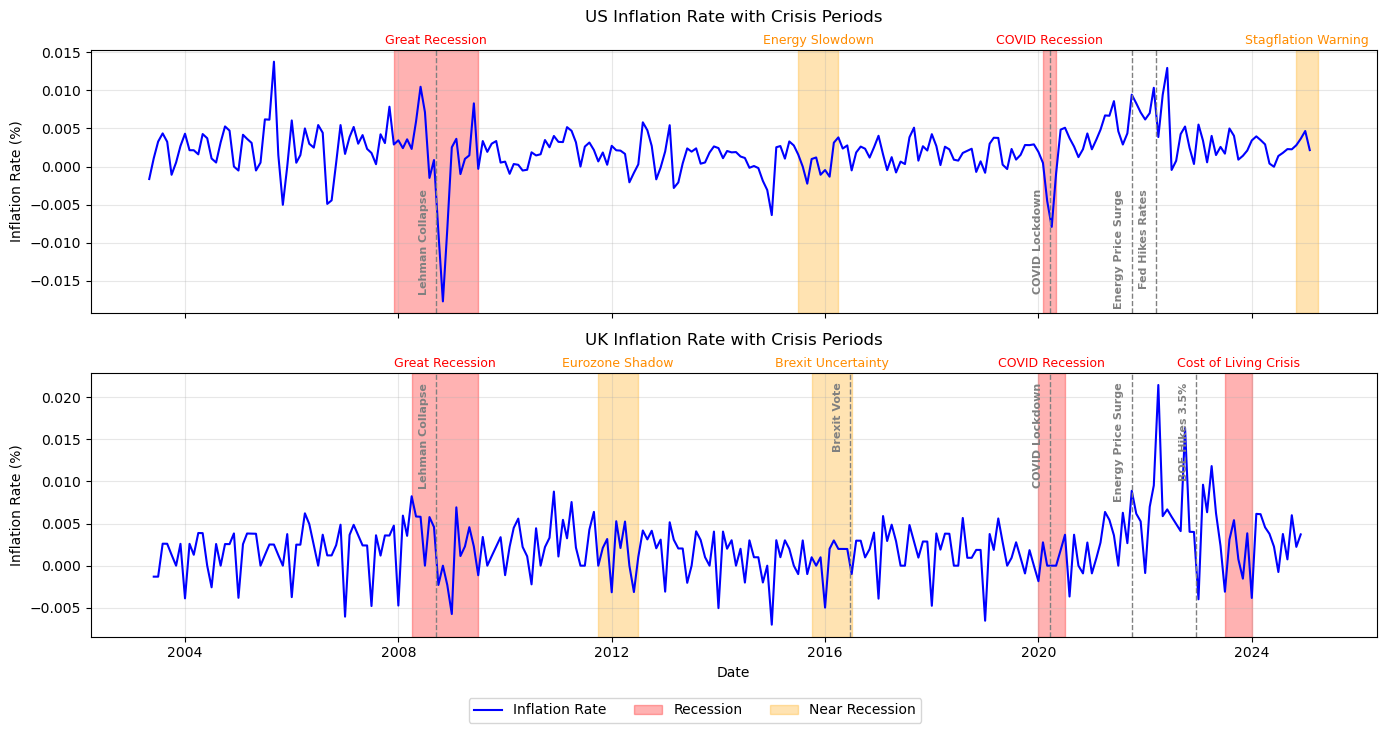

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Named periods
us_recession_named = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-30'), 'COVID Recession')
]
us_near_recession_named = [
    (pd.to_datetime('2015-07-01'), pd.to_datetime('2016-03-31'), 'Energy Slowdown'),
    (pd.to_datetime('2024-11-01'), pd.to_datetime('2025-03-31'), 'Stagflation Warning')
]
uk_recession_named = [
    (pd.to_datetime('2008-04-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'COVID Recession'),
    (pd.to_datetime('2023-07-01'), pd.to_datetime('2023-12-31'), 'Cost of Living Crisis')
]
uk_near_recession_named = [
    (pd.to_datetime('2011-10-01'), pd.to_datetime('2012-06-30'), 'Eurozone Shadow'),
    (pd.to_datetime('2015-10-01'), pd.to_datetime('2016-06-30'), 'Brexit Uncertainty')
]

# US-specific events
us_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-03-16', 'Fed Hikes Rates')
]

# UK/global events
uk_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2016-06-23', 'Brexit Vote'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-12-15', 'BOE Hikes 3.5%')
]

# Plot function
def plot_country(ax, df, title, recession_named, near_recession_named, events, offset=0):
    ax.plot(df['date'], df['infl_rate'], label='Inflation Rate', color='blue')

    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    for start, end, label in near_recession_named:
        ax.axvspan(start, end, color='orange', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='darkorange')

    for date_str, label in events:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days= -50), ax.get_ylim()[1]*0.95 - offset, label, rotation=90,
                color='gray', ha='right', va='top', fontsize=8, fontweight='bold')

    ax.set_title(title, pad = 20)
    ax.set_ylabel("Inflation Rate (%)")
    ax.grid(True, alpha = 0.3)

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

plot_country(ax1, df_us, "US Inflation Rate with Crisis Periods",
             us_recession_named, us_near_recession_named, us_event_annotations, offset=0.0175)

plot_country(ax2, df_uk, "UK Inflation Rate with Crisis Periods",
             uk_recession_named, uk_near_recession_named, uk_event_annotations)

ax2.set_xlabel("Date")

# Shared Legend
handles = [
    plt.Line2D([], [], color='blue', label='Inflation Rate'),
    mpatches.Patch(color='red', alpha=0.3, label='Recession'),
    mpatches.Patch(color='orange', alpha=0.3, label='Near Recession')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.show()


Next, we compare the US and UK inflation rates over time and highlight key recession and near-recession periods for comparison. Recessions are well-defined by NBER for US and by ONS for UK. Near-recessions are economic slowdowns that does not meet official criterias but are still notable based on our team's research. For both countries, inflation dropped sharply during the 2008–2009 Great Recession. The US experienced a sharp dip in inflation rate in the early 2020 due to the Covid-19 pandemic before spiking upwards, likely driven by the negative demand shock introduced by the pandemic, followed up by a major rebound driven by stimulus packages, Quantitative Easing and supply chain disruptions (Jane E. Ihrig et al., 2023). In the UK, periods like the Eurozone crisis (2011–2012) and Brexit uncertainty (2015–2016) coincides with modest inflation fluctuations, while the 2023–2024 cost-of-living crisis shows elevated volatility due to people leaving the workforce. Key global and regional events such as Lehman Collapse, COVID lockdowns, BOE and Fed rate hikes provides context as to how policy shocks affects inflation dynamics. Overall, we see that inflation responds to many factors like geopolitical, policy, and supply chain disruptions.

# 4. How do inflation rates compare across countries? Are there significant differences or are they more or less synchronized over major events?

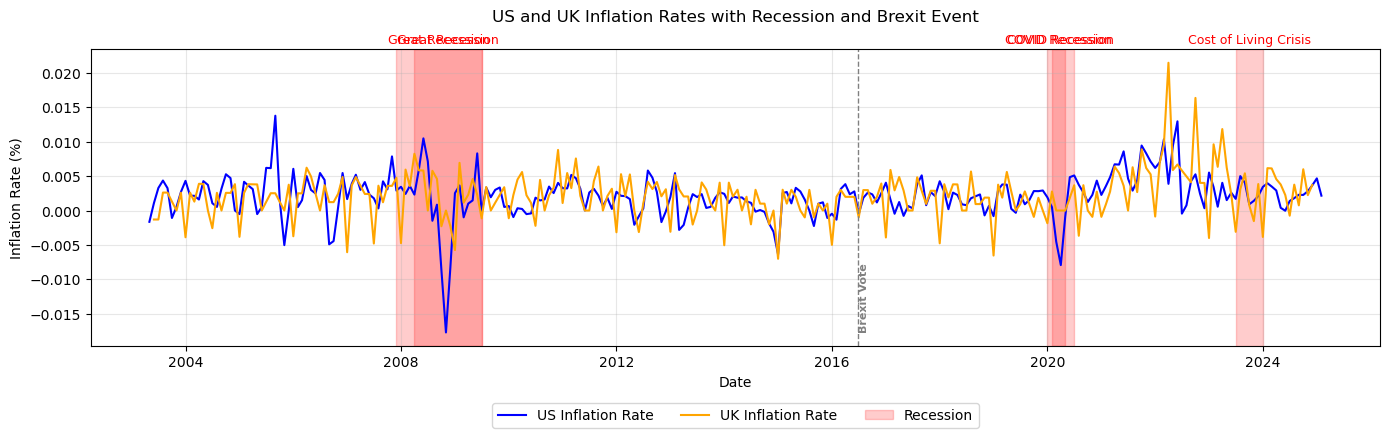

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Only recession periods to show
recession_named = [
    # US
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-30'), 'COVID Recession'),
    # UK
    (pd.to_datetime('2008-04-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'COVID Recession'),
    (pd.to_datetime('2023-07-01'), pd.to_datetime('2023-12-31'), 'Cost of Living Crisis')
]

# Brexit annotation only
event_annotations = [
    ('2016-06-23', 'Brexit Vote')
]

# Overlay plot function
def plot_overlay(ax, df_us, df_uk):
    ax.plot(df_us['date'], df_us['infl_rate'], label='US Inflation Rate', color='blue')
    ax.plot(df_uk['date'], df_uk['infl_rate'], label='UK Inflation Rate', color='orange')

    # Recession shading
    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.2)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    # Brexit vertical line only
    for date_str, label in event_annotations:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days=10), ax.get_ylim()[0] + 0.002,
                label, rotation=90, color='gray', ha='left', va='bottom',
                fontsize=8, fontweight='bold')

    ax.set_title("US and UK Inflation Rates with Recession and Brexit Event", pad=20)
    ax.set_ylabel("Inflation Rate (%)")
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create single plot
fig, ax = plt.subplots(figsize=(14, 5))

plot_overlay(ax, df_us, df_uk)
ax.set_xlabel("Date")

# Legend for shaded area
handles = [
    plt.Line2D([], [], color='blue', label='US Inflation Rate'),
    plt.Line2D([], [], color='orange', label='UK Inflation Rate'),
    mpatches.Patch(color='red', alpha=0.2, label='Recession')
]
ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


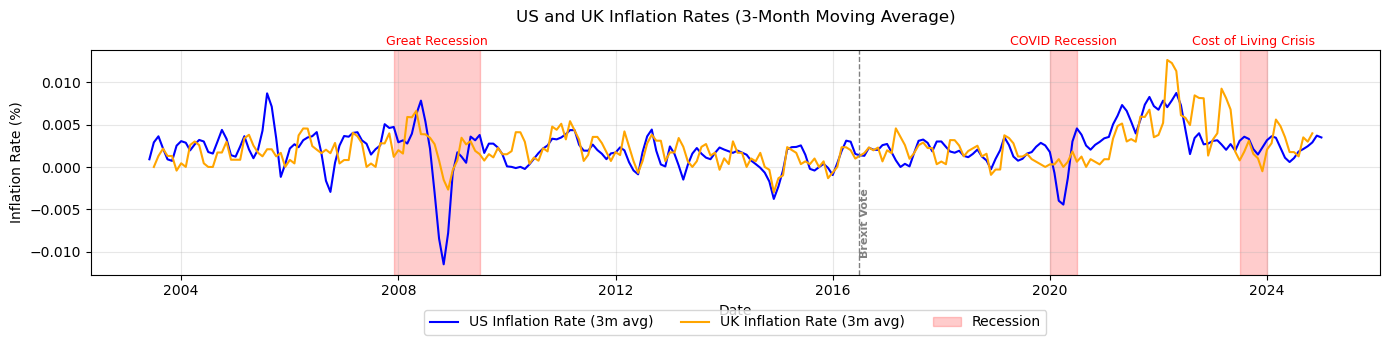

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# --- SMOOTHING: Apply 3-month moving average ---
df_us['infl_rate_smooth'] = df_us['infl_rate'].rolling(window=3, center=True).mean()
df_uk['infl_rate_smooth'] = df_uk['infl_rate'].rolling(window=3, center=True).mean()

# --- Recession periods only ---
recession_named = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'COVID Recession'),
    (pd.to_datetime('2023-07-01'), pd.to_datetime('2023-12-31'), 'Cost of Living Crisis')
]

# Brexit only
event_annotations = [
    ('2016-06-23', 'Brexit Vote')
]

# --- Plotting function with smoothing ---
def plot_overlay(ax, df_us, df_uk):
    # Plot smoothed inflation
    ax.plot(df_us['date'], df_us['infl_rate_smooth'], label='US Inflation Rate (3m avg)', color='blue')
    ax.plot(df_uk['date'], df_uk['infl_rate_smooth'], label='UK Inflation Rate (3m avg)', color='orange')

    # Recession shading
    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.2)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    # Brexit event only
    for date_str, label in event_annotations:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days=10), ax.get_ylim()[0] + 0.002,
                label, rotation=90, color='gray', ha='left', va='bottom',
                fontsize=8, fontweight='bold')

    ax.set_title("US and UK Inflation Rates (3-Month Moving Average)", pad=20)
    ax.set_ylabel("Inflation Rate (%)")
    ax.grid(True, alpha=0.3)
    ax.legend()

# --- Create single plot ---
fig, ax = plt.subplots(figsize=(14, 4))

plot_overlay(ax, df_us, df_uk)
ax.set_xlabel("Date")

# Custom legend
handles = [
    plt.Line2D([], [], color='blue', label='US Inflation Rate (3m avg)'),
    plt.Line2D([], [], color='orange', label='UK Inflation Rate (3m avg)'),
    mpatches.Patch(color='red', alpha=0.2, label='Recession')
]
ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
